# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *BINGYING LIU*
Netid:  *bl199*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

**(a) Implement your own kmeans algorithm**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [26]:
class kmeans(object):
    def __init__(self, k, n_starts):
        self.k = k
        self.tol = 1e-6
        self.n_starts = n_starts
    
    def fit(self, X):
        """K-means with tolerance and random restarts."""
        r, c = X.shape
        best_cost = np.infty
  
        for i in range(self.n_starts):
            centers = X[np.random.choice(r, self.k, replace=False)]
            delta = np.infty
            while delta > self.tol:
                m = cdist(X, centers)
                cost = sum(m.min(axis = 1))
                z = np.argmin(m, axis=1)
                new_centers = np.array([np.mean(X[z==i], axis=0) for i in range(self.k)])
                delta = np.sum((new_centers - centers)**2)
                centers = new_centers
            cost = sum(m.min(axis = 1))
            if cost < best_cost:
                best_cost = cost
                best_z = z
                best_centers = centers
        
        return (best_z, best_cost, best_centers)
    
    def make_plot(self, X):
        """
        Plots for different clusters with cluster centers marked
        """
        best_z, best_cost, best_centers = self.fit(X)
        
        # Create a dictionary featureset that stores k different clusters, with k as their index number
        featureset = {}
        for i in range(self.k):
            featureset[i] = []
    
        it = 0
        for categ in best_z:
            featureset[categ].append(X[it, :])
            it+=1
        
        labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
        colors = 10*["g","r","c","b","k"]
        for key in featureset:
            feature = featureset[key]
            feature = np.vstack(feature)
            plt.scatter(feature[:, 0], feature[:, 1], s=5, color=colors[key], label = labels[key])
        plt.scatter(best_centers[:, 0], best_centers[:, 1], marker='x', linewidth=3, s=100, c='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Blobs dataset with %d clusters' % (len(featureset)))
        plt.legend()
        plt.show()

In [16]:
from sklearn.datasets.samples_generator import make_blobs
blobs_2center = make_blobs(n_samples=500, n_features=2, centers=2)[0]
blobs_5center = make_blobs(n_samples=500, n_features=2, centers=5)[0]

In [28]:
k = 2
n_starts = 200
clf = kmeans(k, n_starts)
best_z, best_cost, best_centers = clf.fit(blobs_2center)

In [29]:
best_cost

628.4325094820422

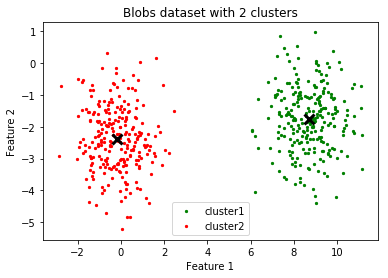

In [30]:
clf.make_plot(blobs_2center)

In [31]:
k = 5
n_starts = 100
clf5 = kmeans(k, n_starts)
best_z, best_cost, best_centers = clf5.fit(blobs_5center)

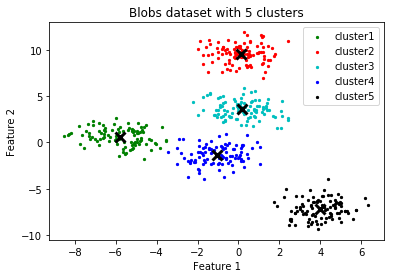

In [32]:
clf5.make_plot(blobs_5center)

In [24]:
C2 = []
C5 = []

for k in range(1, 11):
    clf = kmeans(k, n_starts = 70)
    best_z, best_cost, best_centers = clf.fit(blobs_2center)
    C2.append(best_cost)
    clf5 = kmeans(k, n_starts = 80)
    best_z, best_cost, best_centers = clf5.fit(blobs_5center)
    C5.append(best_cost)

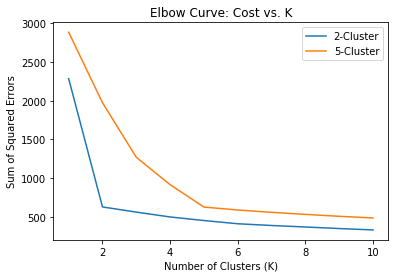

In [25]:
plt.plot(range(1,11),C2,label="2-Cluster")
plt.plot(range(1,11),C5,label="5-Cluster")
plt.title("Elbow Curve: Cost vs. K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors")
plt.legend()
plt.show()

#### Where is the elbow in the curve?

Elbow for the blobs data with 2 clusters is $K=2$, which is very distinct. This means three or more clusters tend to overfit the dataset and one single cluster underfits the data.

Elbow for the blobs data with 5 clusters has an elbow at $K=3$ and a very strong elbow at $K=5$. From the blobs plot above, we can see that there are 5 distinct clusters and three of them are very close together. Therefore, we can say that any clusters below 3 don't capture the true relationship of the data and clusters over 5 tends to overfit the data thgough the sum of squared errors is small.

**(b)**

**K-means**: K-means clustering is a centroid-based clustering method, which we need to specify number of clusters we want at first. Algorithm first randomly initializes k mean values and assigns observations to their nearest mean, mean is then updated to be the centroid and finally this process is repeated until convergence.K-means excels with clusters of equal variance but it struggles with nonlinear boundaries, variation in cluster variance and correlation between features.

**Agglomerative clustering**: Agglomerative clustering is a connectivity-based clustering method, which we need to specify both distance metric (Euclidean/Manhattan/Maximum) and linkage criterion (complete/single/average/centroid). Algorithm first set each observation as a unique cluster, then group the two closest clusters together and repeat this process until there is only one cluster. Agglomerative clustering performs well when clusters are well-separated but struggles when intercluster distance is not sufficient to distunguish between clusters. Also one needs to choose where to cut dengrogram and it can be slow since all pairwise distances between clusters need to be calculated.

**Gaussian mixture models**: Gaussian mixture models is a distribution-based generative model, which we assume there are k mixture components and each component's likelihood is a Gaussian distribution. Algorithm fist defines likelihood of one observation given our model with parameters, assume observations are independent and calculates the log likelihood for all data, finally performs expectation maximization to maximize the log likelihood given model parameters. Gaussian mixture models excels in situations with variation in cluster variance and correlation between features. It can also produce soft clustering and density estimate of the data. It struggles when clusters are not approximately Gaussian.

**DBSCAN**: DBSCAN is a density-based clutering method, which we need to specify distance meausure, radius of a neighbor and minPts. Algorithm first label core and border points according to the specified radius and minPts, group neighboring core points and finally add border points that are neighbors of core points. DBSCAN can find arbitrarily shaped clusters and is robust to outliers. Also one don't need to specify the number of clusters since algorithm can determine itself. However, it can't handle significant variation in cluster density and is not entirely deterministic.

**Spectral clustering**: Spectral clustering is a graph-based clustering method, which we assume there are k clusters. Algorithm first construct an affinity matrix based on the data, then get the principal components of the affinity matrix and then perform clustering in reduced-dimension. Spectral clustering often produces good clustering results since it makes few assumptions about data. However, it's slow for large datasets and requires specifying number of clusters.

**(c)**

In [33]:
aggregation = (pd.read_csv('./data/Aggregation.txt', sep="\t", header=None).values)[:, :2]
compound = (pd.read_csv('./data/Compound.txt', sep="\t", header=None).values)[:, :2]
jain = (pd.read_csv('./data/jain.txt', sep="\t", header=None).values)[:, :2]
d31 = (pd.read_csv('./data/D31.txt', sep="\t", header=None).values)[:, :2]

In [34]:
d31

array([[25.0514,  5.7475],
       [26.6614,  7.3414],
       [25.2653,  6.2466],
       ...,
       [ 5.276 , 17.2475],
       [ 6.4444, 16.2033],
       [ 7.162 , 18.1836]])

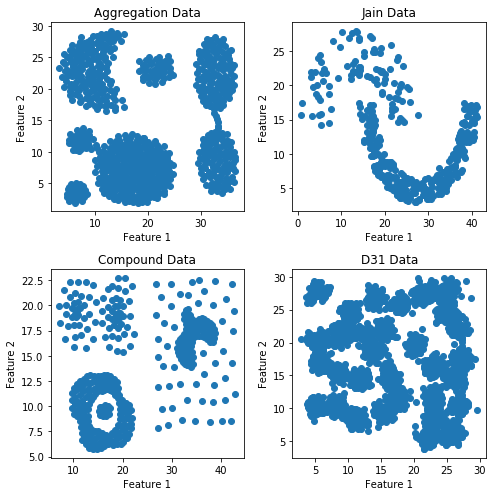

In [35]:
## Plot the data
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
plt.title("Aggregation Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(aggregation[:,0],aggregation[:,1])

plt.subplot(2,2,2)
plt.title("Jain Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(jain[:,0], jain[:,1])

plt.subplot(2,2,3)
plt.title("Compound Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(compound[:,0], compound[:,1])

plt.subplot(2,2,4)
plt.title("D31 Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(d31[:,0], d31[:,1])

plt.tight_layout()
plt.show()

In [36]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as hc
from sklearn import metrics

**Although directly spotting from graph is a good way to choose k in many of the cases, it's always good to use some metrics to pick hyperparameters. Below are the plots I made to choose k for Kmeans, where to cut the dendrogram for aggolerative clustering and how many clusters to choose for GMM.**

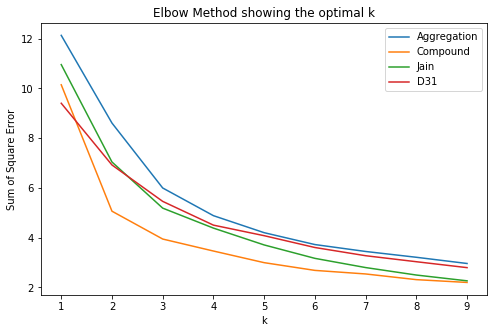

In [37]:
#K-means, decide which k to use best for fitting
K = range(1, 10)
datasets = [aggregation, compound, jain, d31]
labels = ['Aggregation', 'Compound','Jain','D31']
i = 0
plt.figure(figsize=(8,5))

for dataset in datasets:
    distortions = []
    i += 1
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(dataset)
        distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])
    plt.plot(K, distortions, label = labels[i-1])

plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.title('Elbow Method showing the optimal k')
plt.legend()
plt.show()

It seems like true turning point for aggregation dataset is 7, compound dataset 2, jain dataset 6, D31 dataset probably beyond this range.

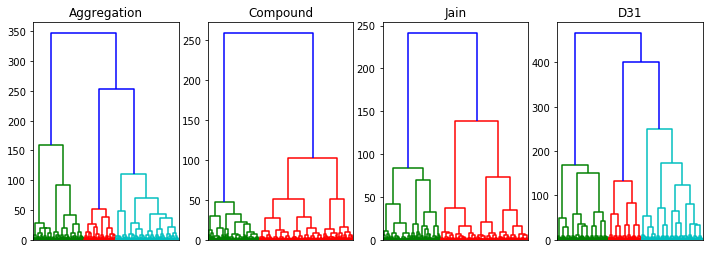

In [38]:
# Where to cut the dendrogram for hierachical clustering model
fig, axes = plt.subplots(1, 4, figsize = (12,4))

for i, dataset in enumerate(datasets):
    cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(dataset)  
    plt.subplot(int('14' + str(i+1) ))
    dend = hc.dendrogram(hc.linkage(dataset, method='ward'))  
    plt.title(labels[i])
    plt.xticks([], [])

plt.show()  

We should cut the dendrogram where vertical distance within each small clusters is reasonably big. So as a result aggregation dataset has 7 clusters, compound dataset has 2 clusters, jain dataset has 6 clusters and D31 dataset has as many small clusters as possible.

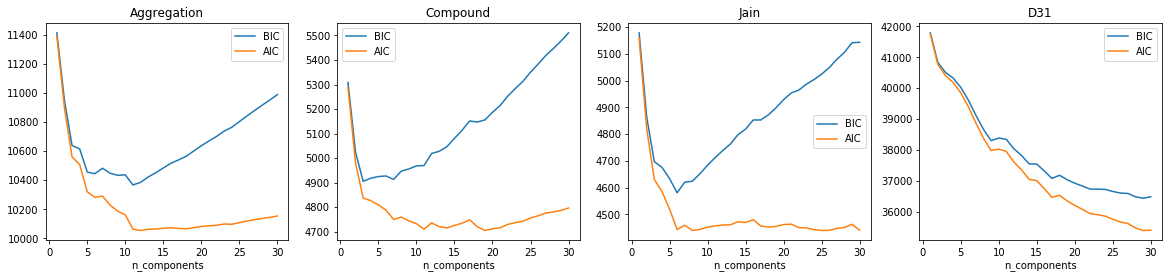

In [79]:
#How to tune Gaussian Mixture Models? -- BIC/AIC/Siluette method
#The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. 
#The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice. 
#As is typical with this sort of problem, the BIC recommends a simpler model.
n_components = np.arange(1, 31)

fig, axes = plt.subplots(1, 4, figsize = (20,4))

for i, dataset in enumerate(datasets):
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(dataset)
          for n in n_components]
    
    plt.subplot(int('14' + str(i+1) ))
    plt.plot(n_components, [m.bic(dataset) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(dataset) for m in models], label='AIC')
    plt.title(labels[i])
    plt.legend(loc='best')
    plt.xlabel('n_components')

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. AIC and BIC tells similar information but and their turning points seem to overlap a lot. But BIC seems to achieve its turning point earlier than AIC. We use BIC in this case, and we yield that turning point for aggregation dataset is 7-10, compound dataset 2, jain dataset 6-7, D31 dataset as large as possible (at this case 31).

I'll handtune the remaining models!

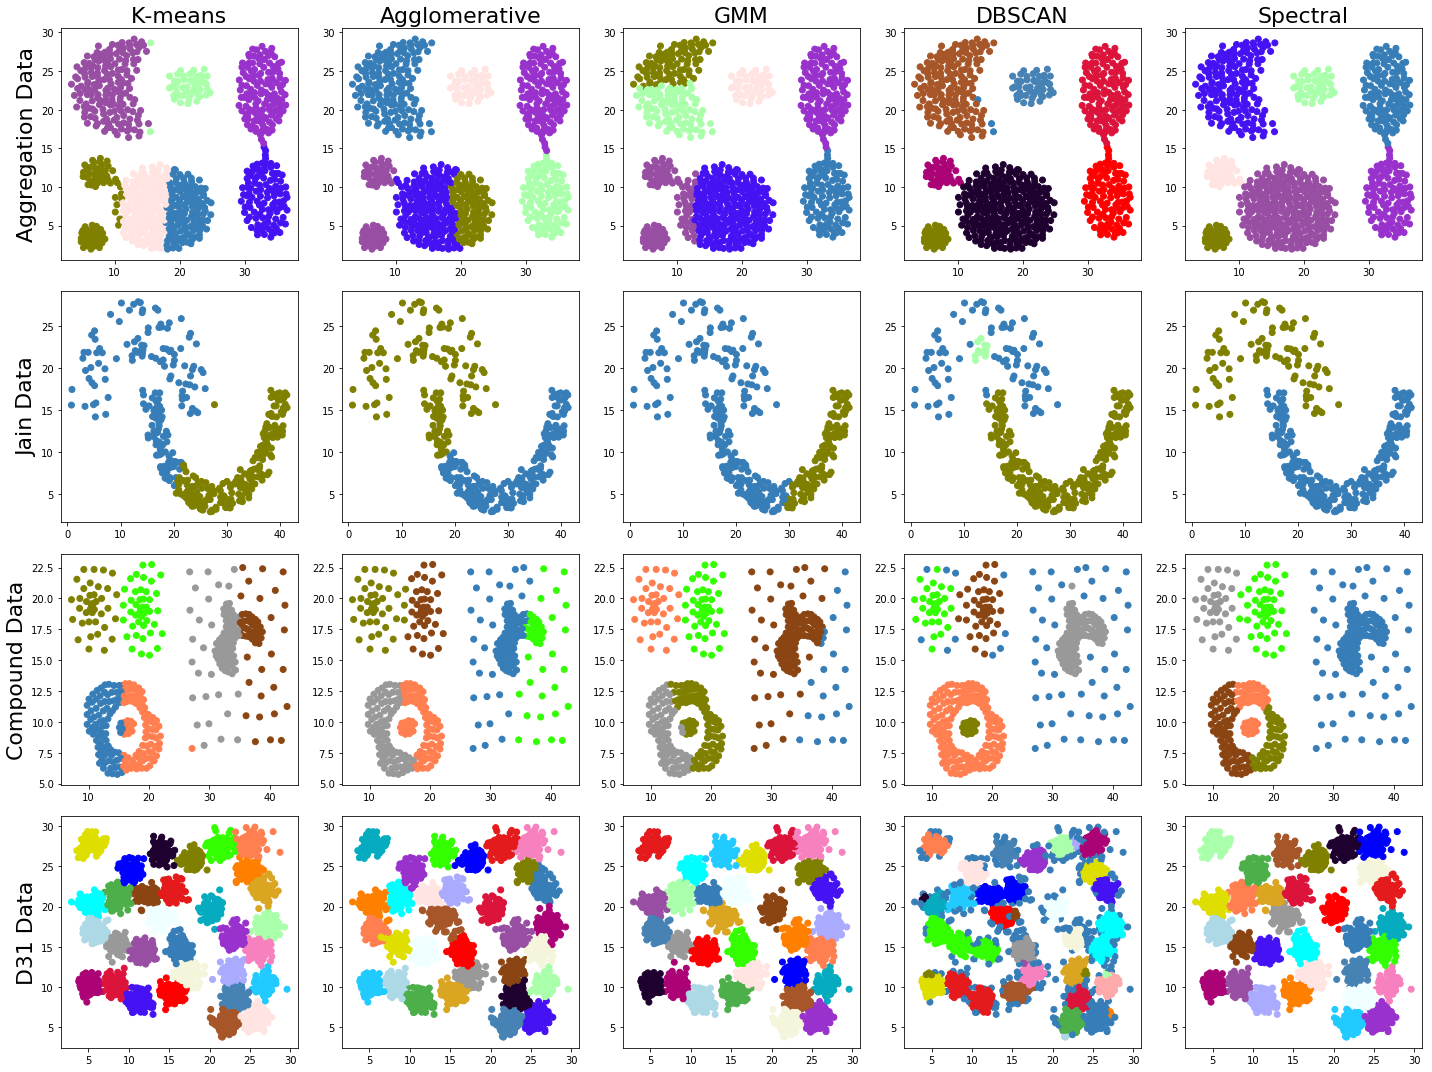

In [48]:
colors = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00', '#ab0376', '#4512f3', '#06abc0', '#33ff00', '#1f0130','#21caff', '#FFAAAA', '#AAFFAA', '#AAAAFF', '#FF0000', 'saddlebrown', '#0000FF',"darkorchid","crimson","aqua","azure","coral","mistyrose","steelblue","lightblue","beige","goldenrod","olive"])
#######################################
# Aggregation Data
#######################################
# Kmeans
aggregation_kmeans = KMeans(n_clusters=7, random_state=0).fit_predict(aggregation)
# Agglomerative
aggregation_agglomerative = AgglomerativeClustering(n_clusters=7).fit_predict(aggregation)
# GMM
aggregation_gmm_model = GaussianMixture(n_components=7).fit(aggregation)
aggregation_gmm = aggregation_gmm_model.predict(aggregation)
# DBSCAN
aggregation_dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean').fit_predict(aggregation)
# Spectral
aggregation_spectral = SpectralClustering(n_clusters=7, eigen_solver=None, random_state=None, n_init=10).fit_predict(aggregation)

# Plot Aggregation Results
plt.figure(figsize=(20,15))

#plt.suptitle("Aggregation Results")
method_agg = [aggregation_kmeans, aggregation_agglomerative, aggregation_gmm, aggregation_dbscan, aggregation_spectral]
titles = ["K-means","Agglomerative", "GMM", "DBSCAN", "Spectral"]

for i, method in enumerate(method_agg):
    plt.subplot(4, 5, i+1)
    plt.title(titles[i], fontsize=22)
    if i == 0:
        plt.ylabel("Aggregation Data",fontsize=22)
    plt.scatter(aggregation[:,0], aggregation[:,1], c=method_agg[i],cmap=colors)
    
#######################################
# Jain Data
#######################################
# Kmeans
jain_kmeans = KMeans(n_clusters=2).fit_predict(jain)
# Agglomerative
jain_agglomerative = AgglomerativeClustering(n_clusters=2).fit_predict(jain)
# GMM
jain_gmm_model = GaussianMixture(n_components=2).fit(jain)
jain_gmm = jain_gmm_model.predict(jain)
# DBSCAN
jain_dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean').fit_predict(jain)
# Spectral
jain_spectral = SpectralClustering(n_clusters=2, eigen_solver=None, random_state=None, n_init=10).fit_predict(jain)

# Plot Jain Results
method_jain = [jain_kmeans, jain_agglomerative, jain_gmm, jain_dbscan, jain_spectral]
for i, method in enumerate(method_jain):
    plt.subplot(4, 5, i+1+5)
    if i == 0:
        plt.ylabel("Jain Data",fontsize=22)
    plt.scatter(jain[:,0], jain[:,1], c=method_jain[i],cmap=colors)

#######################################
# Compound Data
#######################################
# Kmeans
compound_kmeans = KMeans(n_clusters=6, random_state=0).fit_predict(compound)
# Agglomerative
compound_agglomerative = AgglomerativeClustering(n_clusters=6).fit_predict(compound)
# GMM
compound_gmm_model = GaussianMixture(n_components=6).fit(compound)
compound_gmm = compound_gmm_model.predict(compound)
# DBSCAN
compound_dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean').fit_predict(compound)
# Spectral
compound_spectral = SpectralClustering(n_clusters=6, eigen_solver=None, random_state=None, n_init=10).fit_predict(compound)

# Plot Pathbased Results
method_compound = [compound_kmeans, compound_agglomerative, compound_gmm, compound_dbscan, compound_spectral]
for i, method in enumerate(method_compound):
    plt.subplot(4, 5, i+1+5+5)
    if i == 0:
        plt.ylabel("Compound Data",fontsize=22)
    plt.scatter(compound[:,0], compound[:,1], c=method_compound[i],cmap=colors)

#######################################
# D31 Data
#######################################
# Kmeans
d31_kmeans = KMeans(n_clusters=31, random_state=0).fit_predict(d31)
# Agglomerative
d31_agglomerative = AgglomerativeClustering(n_clusters=31).fit_predict(d31)
# GMM
d31_gmm_model = GaussianMixture(n_components=31).fit(d31)
d31_gmm = d31_gmm_model.predict(d31)
# DBSCAN
d31_dbscan = DBSCAN(eps=.41, min_samples=4, metric='euclidean').fit_predict(d31)
# Spectral
d31_spectral = SpectralClustering(n_clusters=31, n_init=20).fit_predict(d31)

# Plot D31 Results
method_d31 = [d31_kmeans, d31_agglomerative, d31_gmm, d31_dbscan, d31_spectral]
for i, method in enumerate(method_d31):
    plt.subplot(4, 5, i+1+5+5+5)
    if i == 0:
        plt.ylabel("D31 Data",fontsize=22)
    plt.scatter(d31[:,0], d31[:,1], c=method_d31[i],cmap=colors)

plt.tight_layout()
plt.show()

#### Which methods work best/worst on each dataset and why?

**Aggregation**: DBSCAN and spectrual clustering works best in this dataset while kmeans, agglomerative and gausian mixuture model don't work as well. The reasons that those clustering methods struggle are the following: there exist some correlations between data, not all of the clusters are well separated and also distribution of data is not approximately gaussian. However, DBSCAN excels at this situation since it can find arbitrarily shaped clusters. Spectrual clustering doesn't make lots of assumptions about the distribution and shape of data, therefore, it can also handle this situation well.

**Jain**: Spectrual clustering works the best because it models connectedness. DBSCAN performs slightly worse than spectrual clustering since density between the two u-shaped clusters are slightly different. Kmeans and GMM perform badly because the data is not from a guassian distribution. Agglomerative performs badly as well because intercluster distance is small and it can't model connectedness.

**Compound**: DBSCAN seems to be the one that performs the best due to its ability to recognize different shapes, although density of different clusters varies a lot (through careful tuning of parameters). Spectrual clustering does ok in this case. It can recognize general shape of different clusters but struggles to model connectedness in the circluar shape. Kmeans, Agglomerative, GMM performs equally worse than DBSCAN because data doesn't comply to the normal distribution assumption and some are not very well separated.

**D31**: All the methods except for DBSCAN do a good job on the D31 dataset. Kmeans and GMM perform quite well because the approximate gaussian distribution requirement is met. Agglomerative does well too since intercluster difference is approximately the same for 31 clusters. Spectrual excels since it makes few assumptions about the dataset. However, in the subplot for DBSCAN, it seems to cluster broder points around each small cluster as one big cluster.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**(a) Apply PCA and reduce the data into a 2-dimensional space**

In [49]:
from sklearn import datasets
from sklearn.decomposition import PCA

digits = datasets.load_digits()
mnist = np.array(list(zip(digits.images, digits.target)))

In [50]:
yLabel = mnist[:, 1]
xImgs = np.array([digits.images[i].flatten() for i in range(0,digits.images.shape[0])])

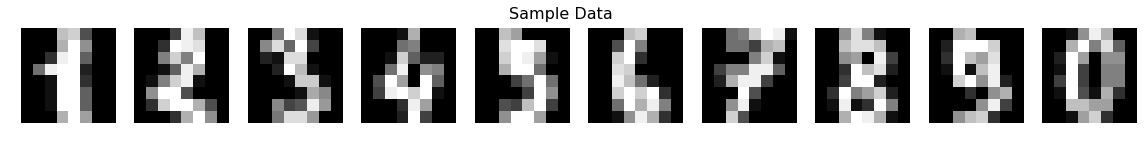

In [51]:
# Plot a sample of the data
plt.figure(figsize=(20,2))
plt.suptitle("Sample Data",fontsize=16)
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(xImgs[i].reshape((8,8)),cmap='gray')
plt.show()

In [52]:
dig_data = np.c_[xImgs, yLabel]
dig_data.shape

(1797, 65)

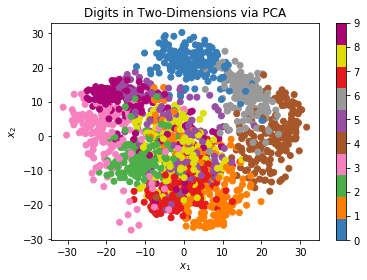

In [53]:
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
pca.fit(dig_data)
transformed_data = pca.transform(dig_data)

# Plot PCA Results
colors = ListedColormap(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00', '#ab0376'])
plt.title("Digits in Two-Dimensions via PCA")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(transformed_data[:,0],transformed_data[:,1], c=yLabel,cmap=colors)
plt.colorbar()
plt.show()

**(b) Apply t-SNE and plot the data in 2-dimensions**

In [54]:
from sklearn.manifold import TSNE

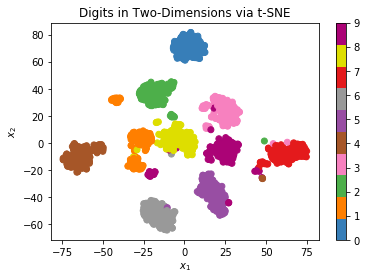

In [55]:
X_tsne = TSNE(n_components=2,perplexity=25,learning_rate=200).fit_transform(dig_data)

plt.title("Digits in Two-Dimensions via t-SNE")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=yLabel,cmap=colors)
plt.colorbar()
plt.show()

**(c) Compare and contrast the performance of two techniques. What are the pros and cons of PCA and t-SNE?**

t-SNE performs much better in 2-dimensional space than PCA at first glance since there is only minor overlaps between points and clusters of digits are fairly separated from each other when applying t-SNE. However, when applying PCA, with first two principal components, features of each digit occupies a somewhat localized space but with significant overlap region. Therefore, we can expect traditional clustering algorithm to do a good job in separating classes after t-SNE dimension reduction but poor job after compression using PCA. PCA is a faster algorithm than t-SNE

PCA  is mainly concerned with perserving large pairwise distances in the map (thus global properties), but those distances sometimes are not very reliable. For instance, euclidean distance between two points on a non-linear manifold would not reflect very well their similarity. T-SNE focuses on perserving small euclidean distances (distances between points and their nearest neighbors--local properties) and is capable of preserving local distances of the high-dimensional data in some mapping to low-dimensional data. However, PCA is deterministic and is a learning function from original space to low-dimensional space, which means it can also apply to unseen data. T-SNE is neither deterministc nor a clustering method.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**(a) Original Images**

In [56]:
dig5_data = dig_data[np.where(dig_data[:, -1] == 5)]
xImgs5 = dig5_data[:, :-1].astype(int)

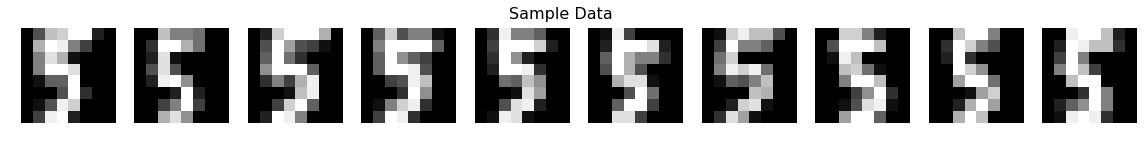

In [57]:
# Plot a sample of digit 5 data
plt.figure(figsize=(20,2))
plt.suptitle("Sample Data",fontsize=16)
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.axis("off")
    plt.imshow(xImgs5[i].reshape((8,8)),cmap='gray')
plt.show()

**(b) Fraction of Variance Explained**

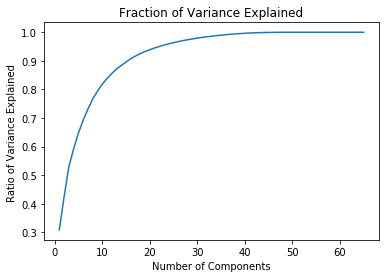

In [58]:
explained_variance = []

for i in range(1, 66):
    pca5 = PCA(n_components=i)
    pca5.fit(dig5_data)
    explained_variance.append(np.sum(pca5.explained_variance_ratio_))

plt.plot(range(1,66),explained_variance)
plt.title("Fraction of Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of Variance Explained ")
plt.show()

**(c) Represent Data Using a Subset of the Total Principal Components**

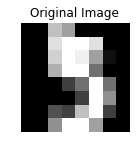

In [59]:
single5 = xImgs5[0]
plt.figure(figsize=(2,2))
plt.axis("off")
plt.title("Original Image")
plt.imshow(single5.reshape((8,8)),cmap='gray')

In [60]:
single5 = single5.reshape(1,-1)

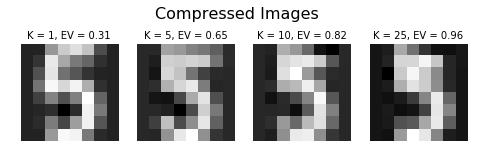

In [61]:
plt.figure(figsize=(8,2.5))
plt.suptitle("Compressed Images",fontsize=16)
for i, num in enumerate([1, 5, 10, 25]):
    pca5 = PCA(n_components=num)
    pca5.fit(xImgs5)
    ev = np.sum(pca5.explained_variance_ratio_)
    pca5_transformed = pca5.transform(single5)
    pca5_original = pca5.inverse_transform(pca5_transformed)
    plt.subplot(1,4,i+1)
    plt.title("K = %d, EV = %.2f" % (num, ev), fontsize=10)
    plt.axis("off")
    plt.imshow(pca5_original.reshape((8,8)),cmap='gray')

**(d) How many principal components are required to well-approximate the data?**

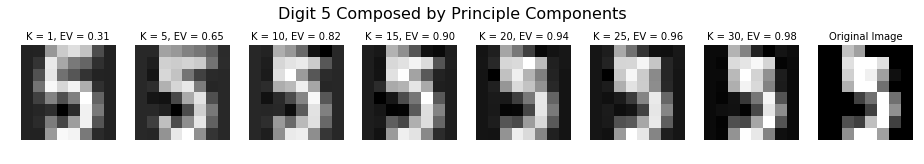

In [62]:
plt.figure(figsize=(16,2.5))
plt.suptitle("Digit 5 Composed by Principle Components",fontsize=16)
for i, num in enumerate([1, 5, 10, 15, 20, 25,30]):
    pca5 = PCA(n_components=num)
    pca5.fit(xImgs5)
    ev = np.sum(pca5.explained_variance_ratio_)
    pca5_transformed = pca5.transform(single5)
    pca5_original = pca5.inverse_transform(pca5_transformed)
    plt.subplot(1,8,i+1)
    plt.title("K = %d, EV = %.2f" % (num, ev), fontsize=10)
    plt.axis("off")
    plt.imshow(pca5_original.reshape((8,8)),cmap='gray')
plt.subplot(1,8,8)
plt.title("Original Image", fontsize=10)
plt.axis("off")
plt.imshow(single5.reshape((8,8)),cmap='gray')

From the compressed images above, I think the reconstructions starting from $K=20$, when variance explained achieves over 0.94, are well-approximate reconstructions to the original image. Because first stroke of 5 in the original image is thick and short while it's not true in the first four images plotted above. When $K=25$, variance explained achieves 0.96 which is considered very good and accurate. 

Another measure we should take a look at is compression ratio (the original dimensionality is 64 and we divide k pinciple components by 64 to acheieve the compression rate.)

**Compression for $K = 1$:** $\frac{1}{64} = 0.016 = 1.6\%$

**Compression for $K = 5$:** $\frac{5}{64} = 0.078 = 7.8\%$

**Compression for $K = 10$:** $\frac{10}{64} = 0.16 = 16\%$

**Compression for $K = 15$:** $\frac{15}{64} = 0.23 = 23\%$

**Compression for $K = 20$:** $\frac{20}{64} = 0.31 = 31\%$

**Compression for $K = 25$:** $\frac{25}{64} = 0.39 = 39\%$

Again, we see that when $K=20$, the transformed image is 31% of its original size and explains 94% of variance, which is a really descent reconstruction. While when $K=1$, the transformed image is only 1.6% of its original size, which is way too small to capture the variance of the original image. And when $K=10$, the transformed image is 16% of its original size and captures 82% of variance which is still considered pretty good (by me).

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

**(a) Create a neural network class**

In [63]:
from sklearn.datasets import make_moons
import random
from sklearn.metrics import roc_curve, auc

In [64]:
def sigmoid(x):
    """
    sigmoid function
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """
    derivative of a sigmoid function
    """
    return sigmoid(x)*(1-sigmoid(x))

def accuracy(label, predict):
    """
    calculate the accuracy by taking in label and predictions
    """
    assert(len(label) == len(predict))
    ans = label - predict
    return 1-np.count_nonzero(ans)/len(label)

In [65]:
class NN(object):
    def __init__(self,layer_config):
        self.layers = layer_config
        self.num_layers= len(layer_config)
        # Randomly initialized weights and biases
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) for i in range(self.num_layers-1)]
        self.biases = [np.random.randn(self.layers[i], 1) for i in range(1, self.num_layers)]
               
    def fit(self, train_data, train_labels, lr, epochs):       
        """
        fit takes in training data and labels, learning rate and epochs, runs feedforward activation and backpropagation to 
        update weights and biases via stochastic gradient descent
        """
        for e in range(epochs):

            if (e%50 == 0) and (e>0):
                print ("Cost @ Epoch {} = {}".format(e,cost_arr[-1]))
            
            cost_arr = []
            
            # For each training sample
            for (x1,x2),y in zip(train_data, train_labels):
                
                # Initialize a place to store calculated adjustments to the weights and biases as we backpropagate. 
                # We make the updates once the error has been propagated all the way back
                adj_w = [np.zeros(w.shape) for w in self.weights]
                adj_b = [np.zeros(b.shape) for b in self.biases]

                ## Feedforward
                # Create lists to store z values and activations as we propagate the layers
                z = []
                activations = []

                # Treat the input data as the first layer activations
                activations.append(np.array([[x1],[x2]]))

                # Run the forward pass for current observation
                for i in range(self.num_layers-1):

                    # Compute the z values for that layer: z = previous_layer_activation * weights + bias
                    z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])

                    # Compute the activation for the z value
                    activations.append(sigmoid(z[-1]))

                ## Compute the cost of that example
                cost = .5*(activations[-1] - y)**2
                cost_arr.append(cost)
                
                ## Backpropagate
                # Starting at the last layer and working backwards
                delta = (activations[-1]- y) * sigmoid_prime(z[-1])

                # Record the suggested weight and bias updates for the last layer
                adj_b[-1] += delta
                adj_w[-1] += np.dot(delta, activations[-2].transpose()).transpose()

                # For the remaining layers
                for l in range(2, self.num_layers):

                    dpred_dz = sigmoid_prime(z[-l])

                    # Calculate the new delta by considering the old delta and the weights of the last relevant layer
                    delta = np.dot(self.weights[-l+1], delta) * dpred_dz
                    adj_b[-l] += delta
                    adj_w[-l] += np.dot(delta, activations[-l-1].transpose()).transpose()

                # Update the weights and biases to reduce cost (Stochastic gradient descent)
                for i in range(len(self.biases)):
                    for j in range(len(self.biases[i])):
                        self.biases[i][j] -= lr*adj_b[i][j]       
                for i in range(len(self.weights)):
                    for j in range(len(self.weights[i])):
                        self.weights[i][j] -= lr*adj_w[i][j]
                        
    def predict(self, test_data):
        """
        input test data and return the prediction if the outcome belongs to one cluster or the other
        """        
        predictions = []
        
        for x1,x2 in test_data:
            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))

            # Use the weights and biases determined in fit and run feedforward
            for i in range(self.num_layers-1):
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                activations.append(sigmoid(z[-1]))

            # Store the prediction
            guess = activations[-1]
            if guess > .5:
                predictions.append(1)
            else:
                predictions.append(0)
                
        return predictions

    def predict_proba(self, test_data):
        """
        input test data and return the probability if the outcome belongs to one cluster
        """      
        probs = []
        
        for x1,x2 in test_data:
            z = []
            activations = []
            activations.append(np.array([[x1],[x2]]))

            # Feedforward
            for i in range(self.num_layers-1):
                z.append(np.dot(self.weights[i].transpose(),activations[-1]) + self.biases[i])
                activations.append(sigmoid(z[-1]))
                
            guess = activations[-1]
            probs.append(guess)
            
        return probs

#### (b) Train and test your model on make_moons dataset

In [66]:
# Generate train and test data with 500 for training and 100 for test
X,y = make_moons(600, noise=0.20)
X_train = X[:500]
y_train = y[:500]
X_test = X[500:]
y_test = y[500:]

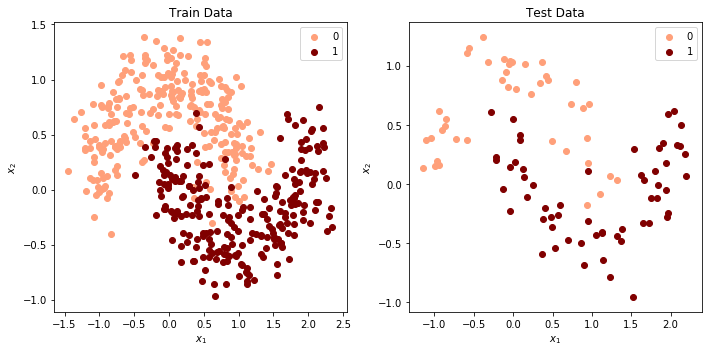

In [67]:
# Plot train and test Data
cdict = {0: 'lightsalmon', 1: 'maroon'}

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
for g in np.unique(y_train):
    i = np.where(y_train == g)
    plt.scatter(X_train[:,0][i], X_train[:,1][i], c = cdict[g], label = g)
plt.legend()

plt.subplot(1,2,2)
plt.title("Test Data")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
for g in np.unique(y_test):
    i = np.where(y_test == g)
    plt.scatter(X_test[:,0][i], X_test[:,1][i], c = cdict[g], label = g)
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
# Create the net with the desired structure
net = NN([2,5,5,1])

# Train the model with the training data
net.fit(X_train,y_train,lr=.2,epochs=300)

# Test the model on the test data
preds = net.predict(X_test)
preds_prob = net.predict_proba(X_test)
print("Final Accuracy: ", accuracy(y_test, preds))

Cost @ Epoch 50 = [[3.18568554e-05]]
Cost @ Epoch 100 = [[8.24285719e-06]]
Cost @ Epoch 150 = [[9.41108593e-06]]
Cost @ Epoch 200 = [[2.43777442e-05]]
Cost @ Epoch 250 = [[4.65743381e-05]]
Final Accuracy:  0.96


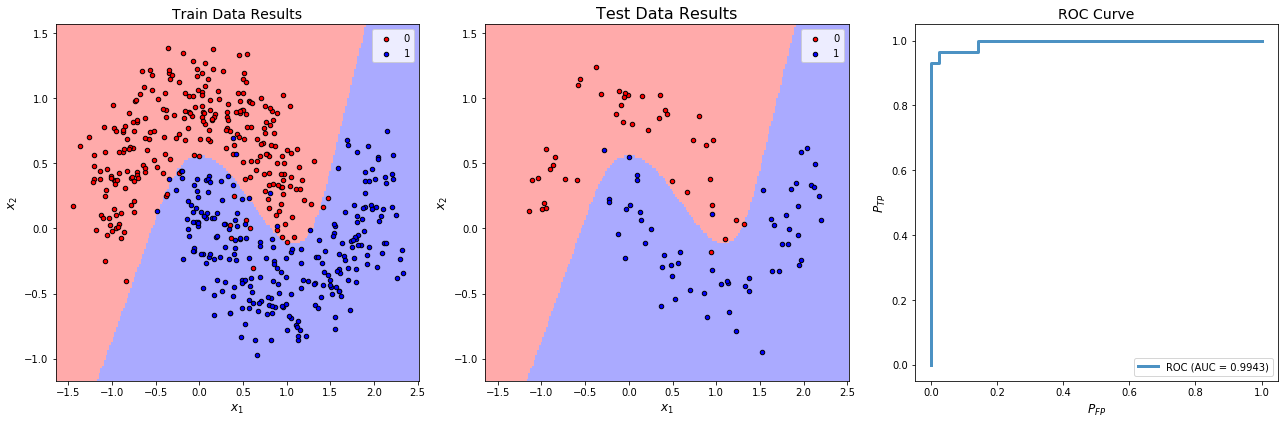

In [70]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cdict_bold = {0: '#FF0000', 1: '#0000FF'}
 
# Compute the decision boundary using a mesh grid
x1_vals = X[:, 0]
x2_vals = X[:, 1]

x_min = np.array(x1_vals).min() - .2
x_max = np.array(x1_vals).max() + .2
y_min = np.array(x2_vals).min() - .2
y_max = np.array(x2_vals).max() + .2

h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_preds = np.array(net.predict(np.c_[xx.ravel(), yy.ravel()]))
mesh_preds = mesh_preds.reshape(xx.shape)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, np.squeeze(np.array(preds_prob)))
roc_auc = auc(fpr, tpr)

# Plot the decision boundary with the training and test data
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title("Train Data Results", fontsize=14)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
for g in np.unique(y_train):
    i = np.where(y_train == g)
    plt.scatter(X_train[:,0][i], X_train[:,1][i], c = cdict_bold[g], edgecolor='k', s=20, label = g)
plt.legend()

plt.subplot(1,3,2)
plt.title("Test Data Results", fontsize=16)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.pcolormesh(xx, yy, mesh_preds,cmap=cmap_light)
for g in np.unique(y_test):
    i = np.where(y_test == g)
    plt.scatter(X_test[:,0][i], X_test[:,1][i], c = cdict_bold[g], edgecolor='k', s=20, label = g)
plt.legend()

plt.subplot(1,3,3)
plt.title("ROC Curve", fontsize=14)
plt.xlabel("$P_{FP}$", fontsize=12)
plt.ylabel("$P_{TP}$", fontsize=12)
plt.plot(fpr, tpr, lw=3, alpha=0.8,label='ROC (AUC = %0.4f)' % (roc_auc))
plt.legend()
plt.tight_layout()

#### (c) Suggest at least two ways in which your neural network implementation can improve

The first way is to increase the number of hidden layers. This would result in a larger neural network which tends to model more complicated relationships in the data. However, since the performance of the model in (b) is quite good, it's not necessary to have more hidden layers and increase computing time.

The second way is to increase the number of nodes in each layer, which has very similar effect compared to the first way. Other methods that can improve the performance of a neural network include regularization (which prevents the model to overfit), using more epochs (training iterations), adaptive learning rate methods and etc.